In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch
import numpy
import matplotlib.pyplot as plt

In [ ]:
from train_script import ChannelFlow
from torch.utils.data import DataLoader, Dataset

In [4]:
# model name
model_name = 'pde_only_cpu_weighted_boundary_unet_like'

# datasets
train_dataset = ChannelFlow(dataset='train')
val_dataset = ChannelFlow(dataset='val')

In [5]:
from cnn_models import ConvAE

In [6]:
reshape_size = 16
model = ConvAE(input_size=reshape_size, channels_init=24)
checkpoint = torch.load('trainings/saved_models/pde_only_cpu_weighted_boundary_unet_like')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [26]:
device='cpu'
dtype = torch.float32

In [25]:
model.eval()
batch_size = 25
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [27]:
for i, (x_sample, y_sample, flow_sample) in enumerate(val_dataloader):
    x_sample = x_sample.to(device=device, dtype=dtype)
    y_sample = y_sample.to(device=device, dtype=dtype)
    flow_sample = flow_sample.to(device=device, dtype=dtype) # move to device, e.g. GPU
    reconstruction = model.forward(torch.cat([x_sample, y_sample, flow_sample], axis=1))
    break

Text(0.5, 0.98, 'Output fields')

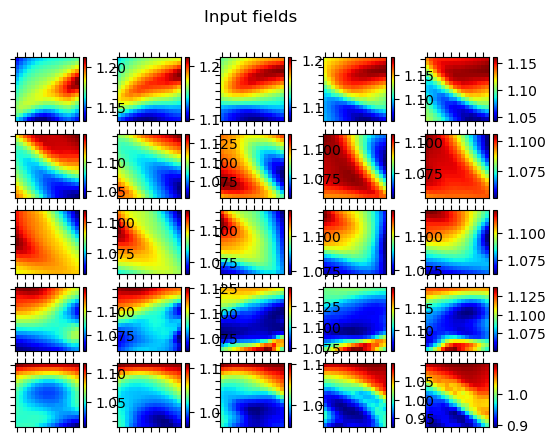

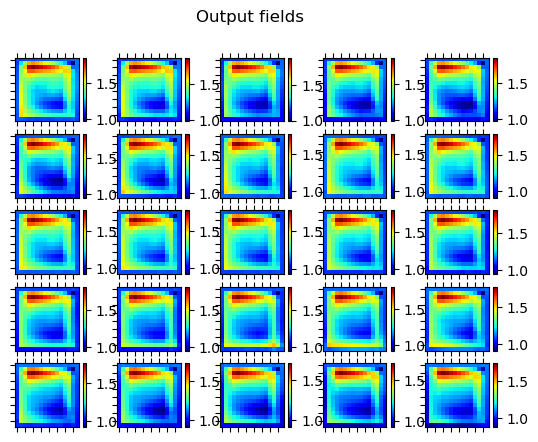

In [28]:
ni=5
nj=5

fig1, axs1 = plt.subplots(ni, nj)
fig2, axs2 = plt.subplots(ni, nj)

for i in range(ni):
    for j in range(nj):
        idx = nj*i + j
        
        c = axs1[i, j].matshow(flow_sample[idx, 0].detach().numpy(), cmap = plt.cm.jet)
        fig1.colorbar(c, ax = axs1[i, j])

        plt.setp(axs1[i, j].get_xticklabels(), visible = False)
        plt.setp(axs1[i, j].get_yticklabels(), visible = False)

        c = axs2[i, j].matshow(reconstruction[idx, 0].detach().numpy(), cmap = plt.cm.jet)
        fig2.colorbar(c, ax = axs2[i, j])

        plt.setp(axs2[i, j].get_xticklabels(), visible = False)
        plt.setp(axs2[i, j].get_yticklabels(), visible = False)
        
fig1.suptitle('Input fields')
fig2.suptitle('Output fields')